Colab is making it easier than ever to integrate powerful Generative AI capabilities into your projects. We are launching public preview for a simple and intuitive Python library (google.colab.ai) to access state-of-the-art language models directly within Pro and Pro+ subscriber Colab environments.  This means subscribers can spend less time on configuration and set up and more time bringing their ideas to life. With just a few lines of code, you can now perform a variety of tasks:
- Generate text
- Translate languages
- Write creative content
- Categorize text

Happy Coding!


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb)

In [ ]:
# @title List available models
from google.colab import ai

ai.list_models()

['google/gemini-2.0-flash',
 'google/gemini-2.0-flash-lite',
 'google/gemini-2.5-flash',
 'google/gemini-2.5-flash-lite',
 'google/gemini-2.5-pro',
 'google/gemma-3-12b',
 'google/gemma-3-1b',
 'google/gemma-3-27b',
 'google/gemma-3-4b']

Choosing a Model
The model names give you a hint about their capabilities and intended use:

Pro: These are the most capable models, ideal for complex reasoning, creative tasks, and detailed analysis.

Flash: These models are optimized for high speed and efficiency, making them great for summarization, chat applications, and tasks requiring rapid responses.

Gemma: These are lightweight, open-weight models suitable for a variety of text generation tasks and are great for experimentation.

In [ ]:
# @title Simple batch generation example
# Only text-to-text input/output is supported
from google.colab import ai

response = ai.generate_text("What is the capital of France?")
print(response)

The capital of France is **Paris**.



In [ ]:
# @title Choose a different model
from google.colab import ai

response = ai.generate_text("What is the capital of England", model_name='google/gemini-2.0-flash-lite')
print(response)

The capital of England is **London**.



For longer text generations, you can stream the response. This displays the output token by token as it's generated, rather than waiting for the entire response to complete. This provides a more interactive and responsive experience. To enable this, simply set stream=True.

In [ ]:
# @title Simple streaming example
from google.colab import ai

stream = ai.generate_text("Tell me a short story.", stream=True)
for text in stream:
  print(text, end='')

The lighthouse keeper, Silas, was a man of routine. Every night, for fifty years, he'd lit the lamp, a beacon against the treacherous rocks that gnawed at the coastline. The sea was his companion, his enemy, and his only confidante. He knew its moods better than his own.

One stormy night, the wind howled like a banshee. The waves crashed against the tower, shaking it to its core. Silas, clinging to the railing, felt a fear he hadn't experienced in decades. This wasn't just a storm; this was a monster.

Suddenly, a small, wooden boat, tossed about like a toy, appeared in the raging sea. He squinted, his heart leaping into his throat. A child. Alone.

Ignoring the raging tempest, Silas raced down the winding stairs, his old bones protesting with every step. He launched his small rescue boat, a fragile craft against the fury of the storm.

Fighting the waves, he reached the child. A girl, no older than seven, clung to the wreckage, her face white with terror. With a strength born of desp

In [ ]:
#@title Text formatting setup
#code is not necessary for colab.ai, but is useful in fomatting text chunks
import sys

class LineWrapper:
    def __init__(self, max_length=80):
        self.max_length = max_length
        self.current_line_length = 0

    def print(self, text_chunk):
        i = 0
        n = len(text_chunk)
        while i < n:
            start_index = i
            while i < n and text_chunk[i] not in ' \n': # Find end of word
                i += 1
            current_word = text_chunk[start_index:i]

            delimiter = ""
            if i < n: # If not end of chunk, we found a delimiter
                delimiter = text_chunk[i]
                i += 1 # Consume delimiter

            if current_word:
                needs_leading_space = (self.current_line_length > 0)

                # Case 1: Word itself is too long for a line (must be broken)
                if len(current_word) > self.max_length:
                    if needs_leading_space: # Newline if current line has content
                        sys.stdout.write('\n')
                        self.current_line_length = 0
                    for char_val in current_word: # Break the long word
                        if self.current_line_length >= self.max_length:
                            sys.stdout.write('\n')
                            self.current_line_length = 0
                        sys.stdout.write(char_val)
                        self.current_line_length += 1
                # Case 2: Word doesn't fit on current line (print on new line)
                elif self.current_line_length + (1 if needs_leading_space else 0) + len(current_word) > self.max_length:
                    sys.stdout.write('\n')
                    sys.stdout.write(current_word)
                    self.current_line_length = len(current_word)
                # Case 3: Word fits on current line
                else:
                    if needs_leading_space:
                        # Define punctuation that should not have a leading space
                        # when they form an entire "word" (token) following another word.
                        no_leading_space_punctuation = {
                            ",", ".", ";", ":", "!", "?",        # Standard sentence punctuation
                            ")", "]", "}",                     # Closing brackets
                            "'s", "'S", "'re", "'RE", "'ve", "'VE", # Common contractions
                            "'m", "'M", "'ll", "'LL", "'d", "'D",
                            "n't", "N'T",
                            "...", "…"                          # Ellipses
                        }
                        if current_word not in no_leading_space_punctuation:
                            sys.stdout.write(' ')
                            self.current_line_length += 1
                    sys.stdout.write(current_word)
                    self.current_line_length += len(current_word)

            if delimiter == '\n':
                sys.stdout.write('\n')
                self.current_line_length = 0
            elif delimiter == ' ':
                # If line is full and a space delimiter arrives, it implies a wrap.
                if self.current_line_length >= self.max_length:
                    sys.stdout.write('\n')
                    self.current_line_length = 0

        sys.stdout.flush()


In [ ]:
# @title Formatted streaming example
from google.colab import ai

wrapper = LineWrapper()
for chunk in ai.generate_text('Give me a long winded description about the evolution of the Roman Empire.', model_name='google/gemini-2.0-flash', stream=True):
  wrapper.print(chunk)

Alright, settle in, because the Roman Empire’s evolution wasn't a tidy, linear
process. It was a centuries-long, tumultuous transformation, marked by
breathtaking innovation, brutal power struggles, and a slow, creeping societal
decay. We're talking about a journey from a humble city-state in the Italian
peninsula to a sprawling, multifaceted empire that left an indelible mark on
law, language, architecture, governance, and even our very understanding of the
world.

It all began, as legend would have it, with Romulus and Remus, twin brothers
raised by a she-wolf, who founded the city of Rome in 753 BCE. Now, that’s just
a legend, but it serves to highlight the foundational spirit of Rome: ambition,
strength, and a certain ruthlessness. Initially, Rome was ruled by a monarchy, a
system eventually deemed unsatisfactory by the powerful patrician class. This
led to the **Roman Republic**, established around 509 BCE, a watershed moment
that would define the early character of Rome.

The Rep

<>:208: SyntaxWarning: invalid escape sequence '\p'
<>:208: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2015689279.py:208: SyntaxWarning: invalid escape sequence '\p'
  color='#98df8a', alpha=0.2, label='Mean $\pm$ Std Dev')


-------------------------------------------------------
K-Fold Cross-Validation Results (K=5, Stratified)
-------------------------------------------------------
Accuracy Scores per Fold: [1.     1.     0.8    0.9333 0.7667]
Mean Accuracy (CV): 0.9000
Standard Deviation (CV): 0.0989
-------------------------------------------------------
Simple 80/20 Split (R.S.=1): Accuracy = 0.9667
Simple 80/20 Split (R.S.=10): Accuracy = 0.9667
Simple 80/20 Split (R.S.=20): Accuracy = 0.9000
Simple 80/20 Split (R.S.=30): Accuracy = 0.9000
Simple 80/20 Split (R.S.=40): Accuracy = 1.0000
-------------------------------------------------------
Running Hyperparameter Tuning (k=1 to 25) with 5-Fold Stratified CV...

Optimal n_neighbors (k): 1 with Mean CV Accuracy: 0.9133


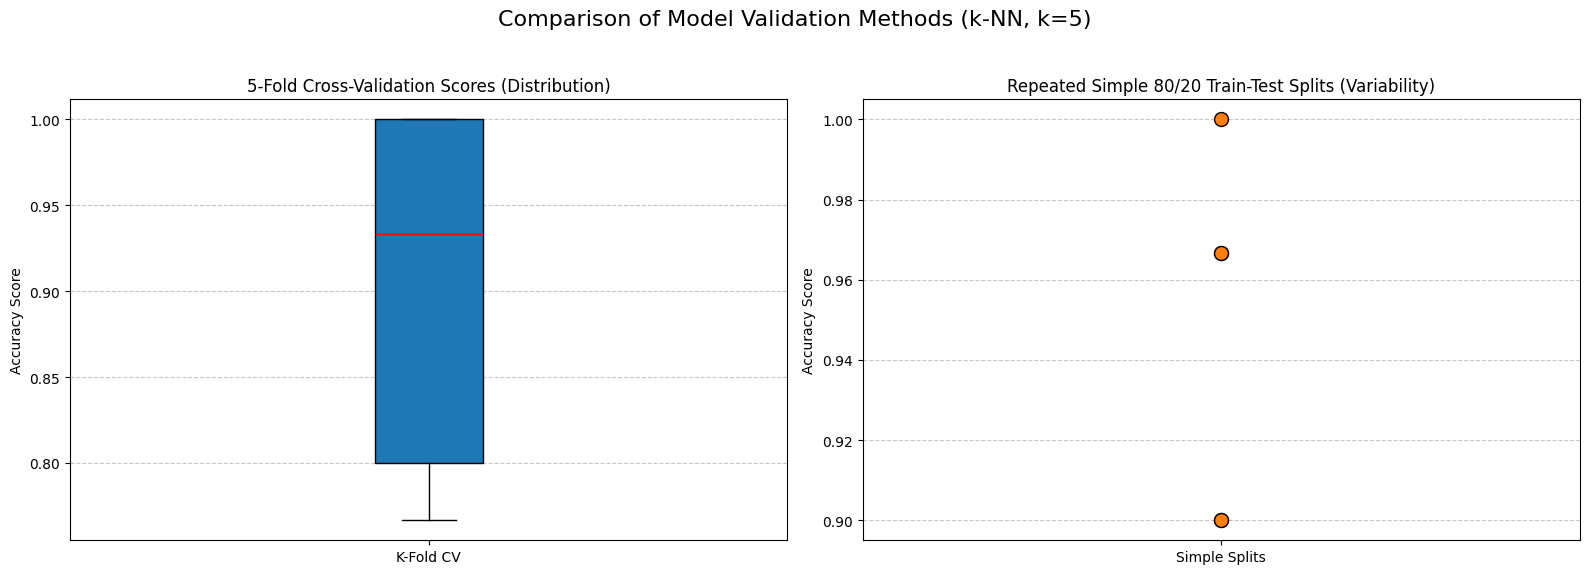

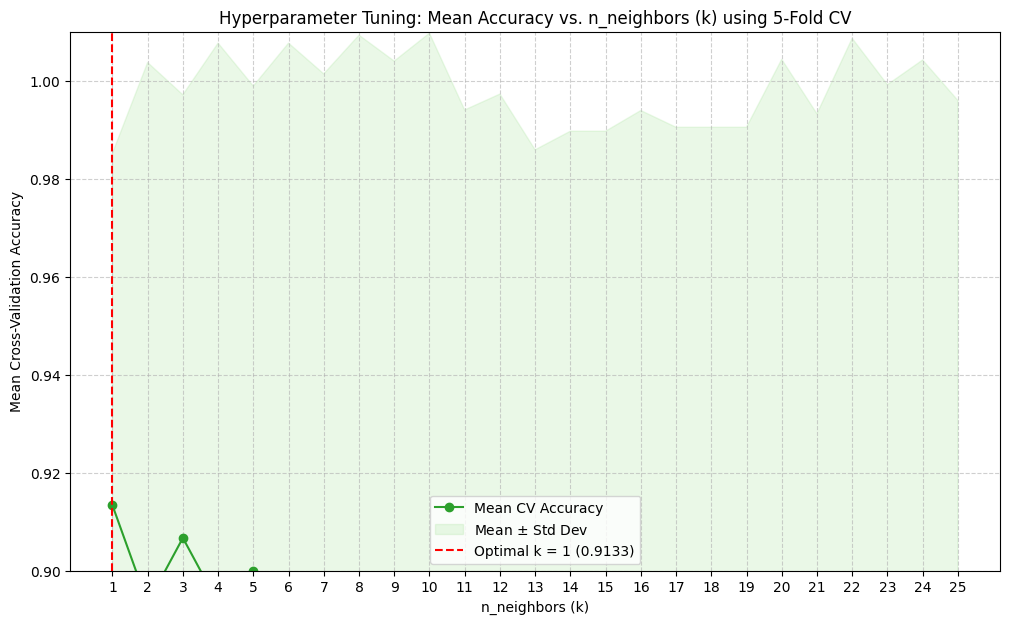

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set a fixed random seed for reproducibility in simple splits
INITIAL_RANDOM_STATE = 42
np.random.seed(INITIAL_RANDOM_STATE)

# --- 1. K-Fold Cross-Validation Implementation (Part A, Task 4 & Bonus) ---

def k_fold_cross_validation(model, X, y, k=5, stratified=False):
    """
    Performs K-Fold Cross-Validation from scratch.

    Args:
        model: A scikit-learn compatible model object (must have fit and predict methods).
        X (np.ndarray): The feature data.
        y (np.ndarray): The target data.
        k (int): The number of folds.
        stratified (bool): If True, ensures class proportions are preserved in each fold (Bonus).

    Returns:
        list: A list of accuracy scores, one for each fold.
    """
    m = X.shape[0]
    scores = []

    # 1. Prepare indices based on stratification requirement
    if stratified:
        # --- Stratified K-Fold Implementation (Bonus Challenge) ---
        # Sort indices primarily by class label to ensure that when we slice
        # the indices array into k folds, each fold gets a proportional share
        # of each class.

        # Create a list of tuples: (original_index, class_label)
        labeled_indices = list(zip(np.arange(m), y))
        labeled_indices.sort(key=lambda x: x[1]) # Sort by class label

        # Unpack back to an array of indices
        indices_sorted = np.array([idx for idx, label in labeled_indices])

        # Shuffling is implicitly handled by the class-sorted indices being distributed
        # sequentially into folds.
        indices = indices_sorted

    else:
        # Standard K-Fold: Shuffle all indices first
        indices = np.arange(m)
        np.random.shuffle(indices)

    X_shuffled = X[indices]
    y_shuffled = y[indices]

    # Calculate fold size
    fold_size = m // k

    for i in range(k):
        # 2. Define Validation and Training Folds

        # Validation fold boundaries
        start = i * fold_size
        # The last fold takes any remainder
        end = (i + 1) * fold_size if i < k - 1 else m

        # Validation Set (Current Fold)
        val_mask = np.zeros(m, dtype=bool)
        val_mask[start:end] = True

        X_val = X_shuffled[val_mask]
        y_val = y_shuffled[val_mask]

        # Training Set (Remaining k-1 Folds)
        X_train = X_shuffled[~val_mask]
        y_train = y_shuffled[~val_mask]

        # 3. Train and Evaluate the Model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        accuracy = accuracy_score(y_val, y_pred)
        scores.append(accuracy)

    return scores

# --- 2. Data Preparation and Model Setup (Part A, Tasks 2, 3) ---

# Load Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Data Preprocessing: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Setup: KNeighborsClassifier with n_neighbors=5
knn_model = KNeighborsClassifier(n_neighbors=5)
K_FOLD_VALUE = 5

# --- 3. Running Cross-Validation for Initial Comparison (Part A, Task 5 & Part B, Task 1) ---

# Use Stratified K-Fold for the initial evaluation
cv_scores = k_fold_cross_validation(knn_model, X_scaled, y, k=K_FOLD_VALUE, stratified=True)

# Model Performance Evaluation (Part B, Task 1)
mean_accuracy_cv = np.mean(cv_scores)
std_dev_accuracy_cv = np.std(cv_scores)

print("-------------------------------------------------------")
print(f"K-Fold Cross-Validation Results (K={K_FOLD_VALUE}, Stratified)")
print("-------------------------------------------------------")
print(f"Accuracy Scores per Fold: {np.round(cv_scores, 4)}")
print(f"Mean Accuracy (CV): {mean_accuracy_cv:.4f}")
print(f"Standard Deviation (CV): {std_dev_accuracy_cv:.4f}")
print("-------------------------------------------------------")

# --- 4. Comparison with Simple Train-Test Split (Part B, Task 2) ---

simple_split_scores = []
# Repeat 5 times with different random states (R.S.) to show variability
random_states = [1, 10, 20, 30, 40]

for rs in random_states:
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
        X_scaled, y, test_size=0.2, random_state=rs
    )
    # Re-initialize model to ensure a clean fit each time
    single_split_model = KNeighborsClassifier(n_neighbors=5)
    single_split_model.fit(X_train_s, y_train_s)
    y_pred_s = single_split_model.predict(X_test_s)
    accuracy_s = accuracy_score(y_test_s, y_pred_s)
    simple_split_scores.append(accuracy_s)
    print(f"Simple 80/20 Split (R.S.={rs}): Accuracy = {accuracy_s:.4f}")
print("-------------------------------------------------------")

# --- 5. Hyperparameter Tuning using K-Fold CV (Bonus Challenge) ---

k_range = range(1, 26) # Test k from 1 to 25
mean_accuracies_tuning = []
std_devs_tuning = []

print("Running Hyperparameter Tuning (k=1 to 25) with 5-Fold Stratified CV...")

for k_val in k_range:
    # 1. Initialize model
    tuning_model = KNeighborsClassifier(n_neighbors=k_val)

    # 2. Run Stratified 5-Fold Cross-Validation
    scores = k_fold_cross_validation(tuning_model, X_scaled, y, k=K_FOLD_VALUE, stratified=True)

    # 3. Store mean and standard deviation
    mean_accuracies_tuning.append(np.mean(scores))
    std_devs_tuning.append(np.std(scores))

# Find the optimal k value
optimal_k_index = np.argmax(mean_accuracies_tuning)
optimal_k = k_range[optimal_k_index]
optimal_accuracy = mean_accuracies_tuning[optimal_k_index]

print(f"\nOptimal n_neighbors (k): {optimal_k} with Mean CV Accuracy: {optimal_accuracy:.4f}")


# --- 6. Visualization (Part B, Task 3 & Bonus) ---

# Plot 1 & 2: Comparison Plots (Same as before)
fig1, axes = plt.subplots(1, 2, figsize=(16, 6))
fig1.suptitle('Comparison of Model Validation Methods (k-NN, k=5)', fontsize=16)

# Combine data for plotting
plot_data = pd.DataFrame({
    'Method': ['K-Fold CV'] * K_FOLD_VALUE + ['Simple Split'] * len(simple_split_scores),
    'Accuracy': cv_scores + simple_split_scores
})

# Plot 1: Box Plot for K-Fold CV Scores
axes[0].boxplot(cv_scores, vert=True, patch_artist=True,
                boxprops=dict(facecolor='#1f77b4', color='black'),
                medianprops=dict(color='red'))
axes[0].set_title(f'{K_FOLD_VALUE}-Fold Cross-Validation Scores (Distribution)')
axes[0].set_xticks([1])
axes[0].set_xticklabels(['K-Fold CV'])
axes[0].set_ylabel('Accuracy Score')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Strip/Scatter Plot for Repeated Simple Train-Test Splits
axes[1].scatter(np.repeat(0.5, len(simple_split_scores)), simple_split_scores,
                s=100, color='#ff7f0e', edgecolor='black', zorder=3)
axes[1].set_title('Repeated Simple 80/20 Train-Test Splits (Variability)')
axes[1].set_xticks([0.5])
axes[1].set_xticklabels(['Simple Splits'])
axes[1].set_ylabel('Accuracy Score')
axes[1].set_xlim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() #

# Plot 3: Accuracy vs. n_neighbors for Hyperparameter Tuning (Bonus)
plt.figure(figsize=(12, 7))
plt.plot(k_range, mean_accuracies_tuning, marker='o', linestyle='-', color='#2ca02c', label='Mean CV Accuracy')
plt.fill_between(k_range,
                 np.array(mean_accuracies_tuning) - np.array(std_devs_tuning),
                 np.array(mean_accuracies_tuning) + np.array(std_devs_tuning),
                 color='#98df8a', alpha=0.2, label='Mean $\pm$ Std Dev')

plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k} ({optimal_accuracy:.4f})')

plt.title(f'Hyperparameter Tuning: Mean Accuracy vs. n_neighbors (k) using {K_FOLD_VALUE}-Fold CV')
plt.xlabel('n_neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_range)
plt.ylim(0.9, 1.01)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show() #
